<a href="https://www.kaggle.com/code/eavprog/abscur-reit-stabil?scriptVersionId=163978803" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Настоящий файл устарел!!!

Новая версия находится по адресу https://www.kaggle.com/code/eavprog/abscur2

---

# Рейтинг стабильности валют по абсолютным курсам

Добро пожаловать на страницу рейтингов по стабильности валют на основе стандартного отклонения их абсолютных валютных курсов!

Здесь вы найдете подробные рейтинги для 45 валют, основанные на различных временных промежутках, включая месяц, квартал, полгода, год, 2 года, 3 года и 5 лет. Наша страница представляет данные в форме столбчатых диаграмм, отображающих стандартное отклонение абсолютного курса валюты, сортированные по возрастанию значения стандартного отклонения.

Мы оцениваем валюты на основе отношения стандартного отклонения абсолютного валютного курса к среднему значению этого курса за текущий временной промежуток, выраженному в процентах. Это позволяет нам определить степень стабильности каждой валюты на основе изменчивости ее курса.

$$
koefNestabiln = \frac{std(A_i,i=begin...end)}{mean(A_i,i=begin...end)} \times 100 \%
$$

На горизонтальной оси диаграмм вы увидите коды валют, а на вертикальной оси будут отражены значения стандартного отклонения. Под каждым графиком представлена информативная таблица, содержащая данные о самых стабильных валютах (с низким стандартным отклонением абсолютного валютного курса) и наиболее нестабильных валютах (с высоким стандартным отклонением).

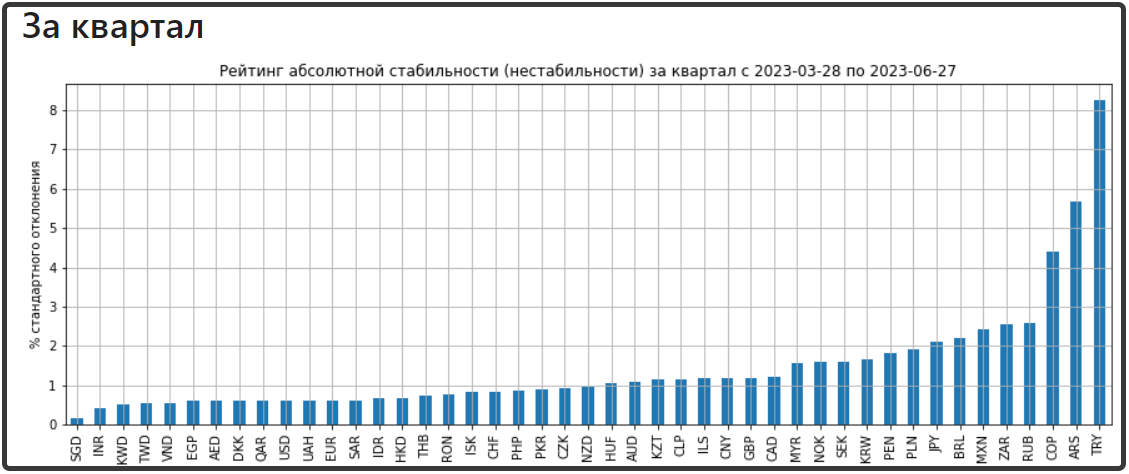

В таблице указаны коды валют, их расшифровки, процентное значение стандартного отклонения, а также ссылки на википедию, где вы сможете найти более подробное описание каждой валюты. Кроме того, мы предоставляем ссылку на страницу с графиком истории абсолютного курса для каждой валюты.

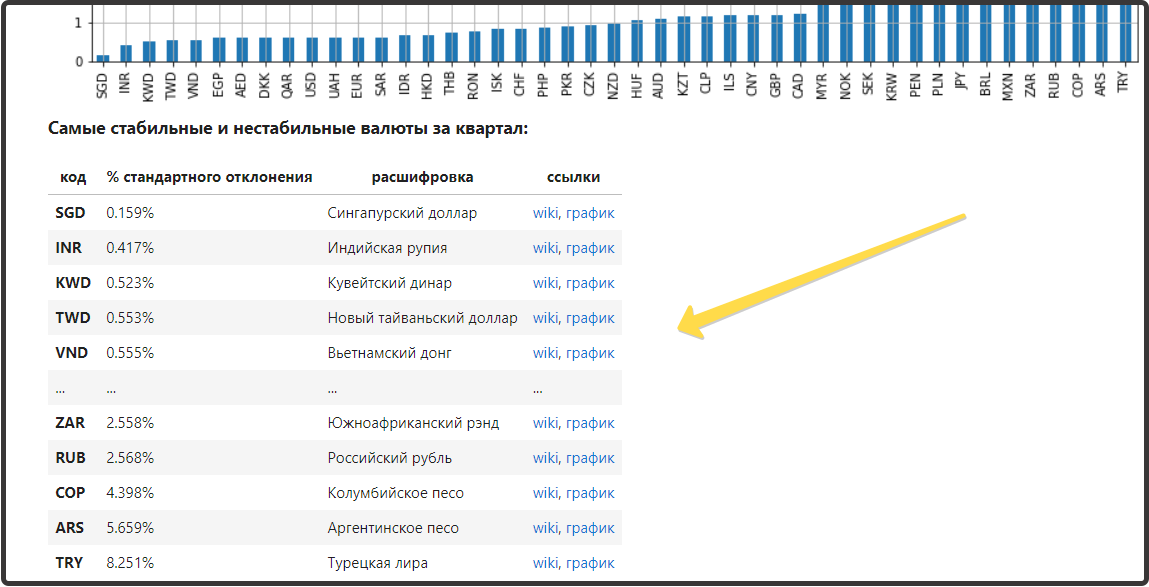

Для вашего удобства мы также предоставляем ссылки на разделы проекта, соответствующие выбранному временному промежутку. Это позволит вам изучать валюты с различных точек зрения и принимать осознанные решения на основе наших рейтингов.

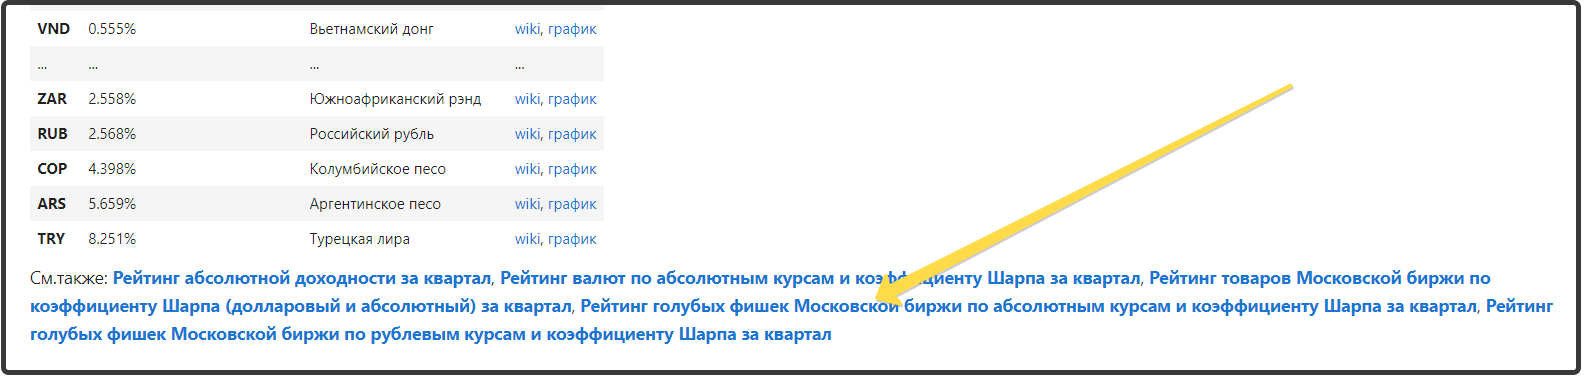

Мы надеемся, что наша страница с рейтингами по стабильности валют будет полезной для ваших исследований и инвестиционных решений. Если у вас возникнут вопросы или потребуется дополнительная информация, не стесняйтесь обращаться к нам. Мы готовы помочь вам в каждом шаге вашего анализа.

In [ ]:
import numpy as np
import pandas as pd
import abscur_menu
from IPython.display import Markdown, display
import datetime
import matplotlib.pyplot as plt
import abscur_post as ap

abscur_menu.print_menu()

abscur = pd.read_csv("/kaggle/input/abscur-data/abscur.csv",index_col=0,parse_dates=['Date'])
ras_cur = pd.read_csv("/kaggle/input/abscur-data/cur_ras.csv",index_col=0)
cur_ras = ras_cur

diap = [[30,"месяц"],[92,"квартал"],[182,"полгода"],[365,"год"],[2*365,"2 года"],[3*365,"3 года"],[5*365,"5 лет"]]

cnt = 0
texts = []

for per,title_per in diap:
    display(Markdown("# За "+title_per))
    
    date_start = abscur.asfreq(freq="D").index[-per]
    date_finish = abscur.index[-1]
    
    res = abscur[abscur.index >= date_start]
    res = res.std()/res.mean()*100
    res.sort_values(ascending=True,inplace=True)
    res.plot.bar(grid=True,title="Рейтинг абсолютной стабильности (нестабильности) за "+title_per+" c "+datetime.datetime.strftime(date_start,"%Y-%m-%d")+" по "+datetime.datetime.strftime(date_finish,"%Y-%m-%d"),ylabel="% стандартного отклонения",legend=False,figsize=(15,5))
    plt.savefig(str(cnt) + ".png")
    plt.show()
    
    text = "**Самые стабильные и нестабильные валюты за " + title_per + ":**\n\n"
    text += "|код|% стандартного отклонения|расшифровка|ссылки|\n"
    text += "|-|-|-|-|\n"
    for n in range(5):
        cur = res.index[n]
        text += "|**" + cur + "**|" + str(np.round(res.loc[cur],3)) + "%|" + cur_ras.loc[cur][0] + "|[wiki](" + cur_ras.loc[cur][1] + "), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#" + cur + ")|\n"
    text += "|...|...|...|...|\n"
    for n in range(len(res.index)-5,len(res.index)):
        cur = res.index[n]
        text += "|**" + cur + "**|" + str(np.round(res.loc[cur],3)) + "%|" + cur_ras.loc[cur][0] + "|[wiki](" + cur_ras.loc[cur][1] + "), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#" + cur + ")|\n"
    display(Markdown(text))
    
    text = "См.также: "
    text += "[**Рейтинг абсолютной доходности за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный) за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-tovar-sharp/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-" + title_per.replace(" ","-") + ")"
    display(Markdown(text))
    
    text_post = "Самые стабильные валюты за " + title_per + " (самый низкий % стандартного отклонения):\n"
    for name in res.index[:10]:
        text_post += name + " (" + ras_cur.loc[name][0] + ") - " + str(np.round(res[name],2)) + "%\n"
    texts.append(text_post)
    cnt += 1
    
#     break
    
num = np.random.randint(cnt)
ap.send_img_and_text(str(num)+".png",texts[num] + "---\nРетинги стабильности для всех временных промежутков в тетрадке на Kaggle по ссылке https://www.kaggle.com/code/eavprog/abscur-reit-stabil")